# Import Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.preprocessing import LabelEncoder

# Model training and evaluation
from sklearn.model_selection import train_test_split


In [3]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [5]:
data = pd.read_csv('/content/drive/MyDrive/dataset/mbti_1.csv')
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [6]:
data.shape

(8675, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [8]:
data.describe()

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [9]:
types = data['type'].unique()
types

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [10]:
count = data.groupby(['type']).count()
count

,posts
type,
ENFJ,190
ENFP,675
ENTJ,231
ENTP,685
ESFJ,42
ESFP,48
ESTJ,39
ESTP,89
INFJ,1470


<Figure size 800x600 with 0 Axes>

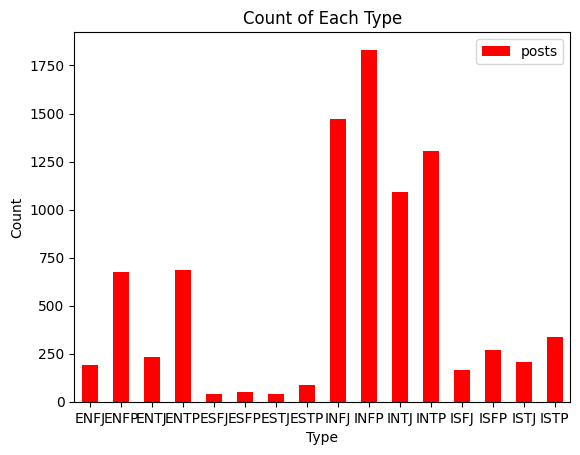

In [11]:
# Plotting
plt.figure(figsize=(8, 6))
count.plot(kind='bar', color='red')  # Create a bar plot
plt.title('Count of Each Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Data Preprocessing

In [12]:
def split_text(text):
    return text.strip("'").split('|||')

In [13]:
data['posts'] = data['posts'].str.lower()
data

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsxhcwe3krw|||...
1,ENTP,'i'm finding the lack of me in these posts ver...
2,INTP,'good one _____ https://www.youtube.com/wat...
3,INTJ,"'dear intp, i enjoyed our conversation the o..."
4,ENTJ,'you're fired.|||that's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edhb_h908||...
8671,ENFP,'so...if this thread already exists someplace ...
8672,INTP,'so many questions when i do these things. i ...
8673,INFP,'i am very conflicted right now when it comes ...


In [14]:
data['posts'] = data['posts'].apply(split_text)

In [15]:
data.head()

,type,posts
0,INFJ,"[http://www.youtube.com/watch?v=qsxhcwe3krw, h..."
1,ENTP,[i'm finding the lack of me in these posts ver...
2,INTP,[good one _____ https://www.youtube.com/wat...
3,INTJ,"[dear intp, i enjoyed our conversation the o..."
4,ENTJ,"[you're fired., that's another silly misconcep..."


In [16]:
def join_strings(string_list, separator=' '):
    return separator.join(string_list)

# Convert 'posts' column to text
data['posts'] = data['posts'].apply(join_strings)
data

,type,posts
0,INFJ,http://www.youtube.com/watch?v=qsxhcwe3krw htt...
1,ENTP,i'm finding the lack of me in these posts very...
2,INTP,good one _____ https://www.youtube.com/watc...
3,INTJ,"dear intp, i enjoyed our conversation the ot..."
4,ENTJ,you're fired. that's another silly misconcepti...
...,...,...
8670,ISFP,https://www.youtube.com/watch?v=t8edhb_h908 ix...
8671,ENFP,so...if this thread already exists someplace e...
8672,INTP,so many questions when i do these things. i w...
8673,INFP,i am very conflicted right now when it comes t...


In [17]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

def preprocess_text(text):
    # Change https or http to just word 'link'
    text = re.sub(r'(http|https|www)\S+', 'link', text)
#     text = text.replace(r'http\S+|www.\S+', 'link', regex=True)

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

    # Perform stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Join the stemmed tokens back into a single string
    processed_text = ' '.join(stemmed_tokens)

    return processed_text

In [18]:
data['posts'] = data['posts'].apply(preprocess_text)
data

,type,posts
0,INFJ,link link enfp intj moment link sportscent top...
1,ENTP,'m find lack post alarm . sex bore 's posit of...
2,INTP,"good one _____ link cours , say know ; 's bles..."
3,INTJ,"dear intp , enjoy convers day . esoter gab nat..."
4,ENTJ,'re fire . 's anoth silli misconcept . approac...
...,...,...
8670,ISFP,link ixfp alway think cat fi dom reason . link...
8671,ENFP,... thread alreadi exist someplac els ( : link...
8672,INTP,mani question thing . would take purpl pill . ...
8673,INFP,conflict right come want children . honestli m...


In [19]:
# Encode MBTI types to numeric labels
label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['type'])
num_classes = len(label_encoder.classes_)

In [20]:
data.head()

,type,posts,label_encoded
0,INFJ,link link enfp intj moment link sportscent top...,8
1,ENTP,'m find lack post alarm . sex bore 's posit of...,3
2,INTP,"good one _____ link cours , say know ; 's bles...",11
3,INTJ,"dear intp , enjoy convers day . esoter gab nat...",10
4,ENTJ,'re fire . 's anoth silli misconcept . approac...,2


In [21]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from transformers import AdamW

# Load BERT Tokenizer and Model

In [22]:
# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Load pre-trained BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=16)  # Adjust num_labels for your task

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [23]:
# Move model to CUDA device if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

# Tokenize Text Data

In [24]:
# Tokenize the preprocessed text data and convert to BERT input format
def tokenize_text(text):
    # Use BERT tokenizer to tokenize the text
    tokens = tokenizer.encode_plus(text, add_special_tokens=True, max_length=512, truncation=True,
                                    padding='max_length', return_tensors='pt')
    return tokens

# Apply tokenization to all posts in the dataset
data['tokenized_posts'] = data['posts'].apply(tokenize_text)

# Split Data into Training and Validation Sets

In [25]:
# Split data into training and validation sets
train_data, val_data = train_test_split(data, test_size=0.1, random_state=42)

# Define DataLoader for training and validation sets
class MBTIDataset(torch.utils.data.Dataset):
    def __init__(self, posts, labels):
        self.posts = posts
        self.labels = labels

    def __len__(self):
        return len(self.posts)

    def __getitem__(self, idx):
        input_ids = self.posts[idx]['input_ids'].flatten().to(device)
        attention_mask = self.posts[idx]['attention_mask'].flatten().to(device)
        label = torch.tensor(self.labels[idx], dtype=torch.long).to(device)
        return {'input_ids': input_ids,
                'attention_mask': attention_mask,
                'labels': label}


# Prepare DataLoader for training and validation sets
train_dataset = MBTIDataset(train_data['tokenized_posts'].tolist(), train_data['label_encoded'].tolist())
val_dataset = MBTIDataset(val_data['tokenized_posts'].tolist(), val_data['label_encoded'].tolist())

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=16)

# Define Training Loop and Optimizer

In [26]:
# Set up optimizer and learning rate scheduler
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 10

# Training loop
model.train()
for epoch in range(num_epochs):
    total_train_loss = 0.0
    correct_train_predictions = 0
    total_train_samples = 0

    # Training phase
    for batch in train_dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        # Compute training statistics
        total_train_loss += loss.item()
        _, predicted_labels = torch.max(outputs.logits, dim=1)
        correct_train_predictions += torch.sum(predicted_labels == labels).item()
        total_train_samples += labels.size(0)

    # Calculate training accuracy and average loss
    train_accuracy = correct_train_predictions / total_train_samples
    average_train_loss = total_train_loss / len(train_dataloader)

    # Validation phase
    model.eval()
    total_val_loss = 0.0
    correct_val_predictions = 0
    total_val_samples = 0

    for batch in val_dataloader:
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels']

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

        # Compute validation statistics
        total_val_loss += loss.item()
        _, predicted_labels = torch.max(outputs.logits, dim=1)
        correct_val_predictions += torch.sum(predicted_labels == labels).item()
        total_val_samples += labels.size(0)

    # Calculate validation accuracy and average loss
    val_accuracy = correct_val_predictions / total_val_samples
    average_val_loss = total_val_loss / len(val_dataloader)

    # Print training and validation metrics for each epoch
    print(f"Epoch {epoch + 1}/{num_epochs}:")
    print(f"  Train Loss: {average_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"  Validation Loss: {average_val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Set model back to training mode
    model.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/10:
  Train Loss: 2.1787, Train Accuracy: 0.2860
  Validation Loss: 1.7613, Validation Accuracy: 0.4988
Epoch 2/10:
  Train Loss: 1.5530, Train Accuracy: 0.5486
  Validation Loss: 1.4414, Validation Accuracy: 0.5726
Epoch 3/10:
  Train Loss: 1.2847, Train Accuracy: 0.6267
  Validation Loss: 1.4049, Validation Accuracy: 0.5680
Epoch 4/10:
  Train Loss: 1.1086, Train Accuracy: 0.6785
  Validation Loss: 1.4052, Validation Accuracy: 0.5680
Epoch 5/10:
  Train Loss: 0.9514, Train Accuracy: 0.7279
  Validation Loss: 1.4300, Validation Accuracy: 0.5760
Epoch 6/10:
  Train Loss: 0.7911, Train Accuracy: 0.7790
  Validation Loss: 1.4696, Validation Accuracy: 0.5968
Epoch 7/10:
  Train Loss: 0.6184, Train Accuracy: 0.8330
  Validation Loss: 1.5753, Validation Accuracy: 0.5657
Epoch 8/10:
  Train Loss: 0.5134, Train Accuracy: 0.8624
  Validation Loss: 1.6444, Validation Accuracy: 0.5806
Epoch 9/10:
  Train Loss: 0.4090, Train Accuracy: 0.8947
  Validation Loss: 1.6511, Validation Accuracy:

In [27]:
model.save_pretrained('/content/drive/MyDrive/models')
tokenizer.save_pretrained('/content/drive/MyDrive/models')

('/content/drive/MyDrive/models/tokenizer_config.json',
 '/content/drive/MyDrive/models/special_tokens_map.json',
 '/content/drive/MyDrive/models/vocab.txt',
 '/content/drive/MyDrive/models/added_tokens.json')

In [30]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the saved tokenizer and model directories
model_directory = '/content/drive/MyDrive/models'
tokenizer_directory = '/content/drive/MyDrive/models'

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained(tokenizer_directory)
model = BertForSequenceClassification.from_pretrained(model_directory)

# Define a function to predict personality type for unseen text
def predict_personality_type(text):
    # Tokenize and preprocess the text
    inputs = tokenizer.encode_plus(text, add_special_tokens=True, max_length=512, truncation=True,
                                   padding='max_length', return_tensors='pt')

    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    # Perform prediction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    # Get predicted label (personality type)
    predicted_label_idx = torch.argmax(outputs.logits, dim=1).item()
    predicted_label = label_encoder.classes_[predicted_label_idx]  # Assuming label encoder is used during training

    return predicted_label

# Example usage: Predict personality type for unseen text
unseen_text = "Its not like our views were unsolicited. What a victim.|||Sometimes I just really like impoverished rap music.   https://www.youtube.com/watch?v=Xh0vA6_8mv8|||I probably would have lost it too. His stonewalling was insignificant. He was being an idiot over semantics that didn't have any impact on anything. It's one thing to stone wall on critical shit, but...|||I would have just taken the project and gave them something later.|||The court deposition wasn't a skit. That actually happened. It was a verbatim reenactment.|||And her ass.|||I'll flirt a woman for a piece of candy at the grocery store. Of course. I use whatever I have at my disposal to get what I want in the most efficient manner possible. If that means flirting that...|||http://youtu.be/PZbqAMEwtOE|||Yes. In the comments she gave more info, then was shut down because she went from having a crush on her boss and wanted to know how to impress him, to her boss is married and she wasn't interested. I...|||What's this we thing about?|||Callaendia are you the same INFP girl who was on the ENTJ Facebook forum with this similar question? I just have to ask because the times are so close together, and the scenario is so similar.|||3X|||11/25 I do not modify myself to suit others, however I do like the spotlight.|||I think the easiest and most efficient approach is a tarp, jigsaw, and mulcher. But that's just my personal preference. Not all ENTJs are the same.|||Just don't hump my leg...|||What are you like a chihuahua or some shit?|||I once dumped a girl in college who I was having a 6 month romp with over making me late for class. She said I was petty for it.|||DEAD XD   http://youtu.be/PaghIdSJKvQ|||MBTIPC perfect. I don't like dealing with middle men either. You can talk directly to me.  ;)|||I can sell you the dream...|||LOL DEAD. Ha!|||The point is that when you are making a point of thinking critically but not thinking beyond common sense, you aren't using your brain. A little bit of effort now to have an understanding of the...|||That's just common sense  No, that's just a value judgement backed by popular opinion from social stupidity/laziness. That's only doing what works instead of pushing harder and doing what is...|||When it comes to children, they either cry or climb all over me. There is never a gray area.|||I don't drink, but when I drank:  Beer: Hardcore ciders and sweet brown ales.  Liquor: VODKA chased with cran or water. < my preferred drink  Wine: Anything dark, dry and sweet. There are so...|||Well that escalated quickly.|||https://encrypted-tbn2.gstatic.com/images?q=tbn:ANd9GcSDA-GNSWRqDgxZibQPN3dfS2LlChp8tO6FCCeVBHuIlYUVfjzkVH2sGAv_  You deal with them.|||tl;dr fuuuuu|||Those people who think they know everything are a great annoyance to those of us who do IA|||@Darth Alpha  I would never claim it to be healthy either. Just in my best interest.|||On loyalty:  I am loyal to the vision. I am loyal to those who share the vision. I am not into co-dependency in terms of the vision cannot be accomplished without others involved. I stay on course,...|||Your answer was worth more time to entertain than the OP.|||Hey @MsBossyPants are you down for a debate on Ayn Rand vs Marx? Maybe we should talk about our poor Fi? Oh I know- let's try to correlate testing ENTJ with being sociopathic.  :laughing:|||Hitler was no exception- this concept has, is and always will be a principle, tenet, and rule. Politics, ideology, religion, eating, shitting usual.  And if it's not ,then there is nothing to...|||Hitler thought he was doing great things. Stalin thought he was justified. These guys thought they were uncorrupt. They viewed any heretic to their dogmas as morally bankrupt, and so did many of...|||Meh. There were plenty of evil people who did good things, and plenty of good people who got blood on their hands achieving and attaining higher goals. Bad situations that had good long term effects,...|||You would have to ask the OP. He is asking ambiguous questions. I would go with whatever is more efficient/effective vs what is perceived as good every time in the good vs evil dichotomy. It in my...|||Good vs Bad =/= Good vs Evil One is an objective positive vs negative dichotomy, the other is a subjective interpretation of characteristics. "
predicted_personality_type = predict_personality_type(unseen_text)

print("Predicted Personality Type:", predicted_personality_type)

Predicted Personality Type: ENTJ
